In [1]:
import pandas as pd

In [27]:
df = pd.read_excel(io = r'cardio_train.xlsx')
data = df
data.head()

,id,gender,bmi,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,2,21.97,18393,110,80,1,1,0,0,1,0
1,1,1,34.93,20228,140,90,3,1,0,0,1,1
2,2,1,23.51,18857,130,70,3,1,0,0,0,1
3,3,2,28.71,17623,150,100,1,1,0,0,1,1
4,4,1,23.01,17474,100,60,1,1,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

X = data.drop(['cardio','id'], axis=1)  # 特征变量
y = data['cardio']  # 目标变量

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


随机森林

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 选择模型
model = RandomForestClassifier()

In [30]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.705860939206407
Confusion Matrix:
 [[4993 1893]
 [2147 4702]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71      6886
           1       0.71      0.69      0.70      6849

    accuracy                           0.71     13735
   macro avg       0.71      0.71      0.71     13735
weighted avg       0.71      0.71      0.71     13735



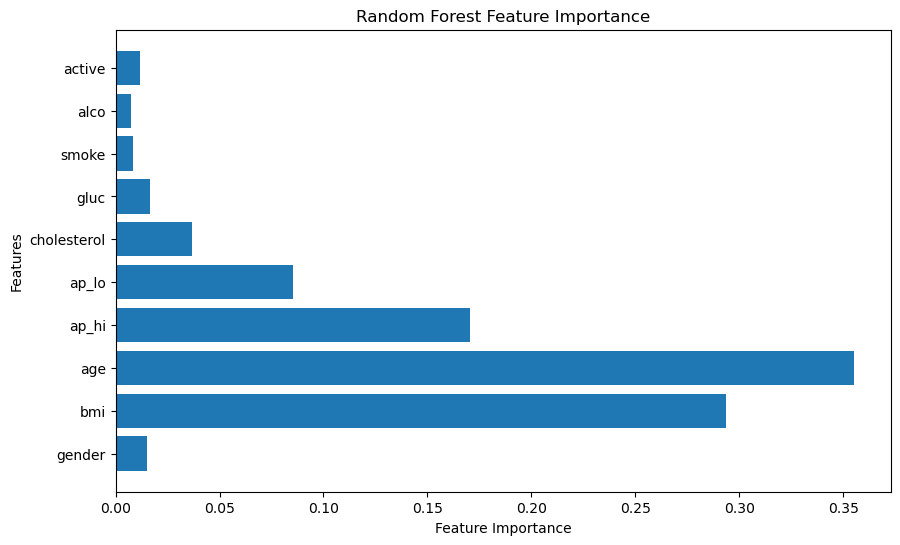

In [32]:
import matplotlib.pyplot as plt

# 获取特征重要性
feature_importance = model.feature_importances_

# 将特征重要性可视化
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


网格划分寻找最优参数